In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, loguniform
# models

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt




In [58]:
train = pd.read_excel(r'Kepler Data.xlsx')


In [59]:
train.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [61]:
train.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,7.690628e+06,0.480829,0.208595,0.232748,0.197512,0.120033,75.671358,0.002148,-0.002148,166.183251,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2.653459e+06,0.476928,4.767290,0.422605,0.398142,0.325018,1334.744046,0.008236,0.008236,67.918960,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,1.293514e+07,1.000000,465.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [62]:

# Assuming df is your DataFrame
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    print(f'The number of unique values in {column} is {train[column].nunique()}')

The number of unique values in kepoi_name is 9564
The number of unique values in kepler_name is 2360
The number of unique values in koi_disposition is 3
The number of unique values in koi_pdisposition is 2
The number of unique values in koi_tce_delivname is 3


In [63]:
train.isna().sum()

kepid                   0
kepoi_name              0
kepler_name          7204
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

drop kepoi_name,kepler_name because of large unique values

drop koi_teq_err1,drop koi_teq_err2 because of large number of null values

drop kepid

drop all the null rows

In [64]:
train_df = train.drop(['kepid','kepoi_name','kepler_name','koi_teq_err1','koi_teq_err2','koi_score'],axis=1)
train_df = train_df.dropna()

In [66]:
train_df['koi_disposition'].value_counts() #class imbalance

FALSE POSITIVE    4214
CONFIRMED         2337
CANDIDATE         2193
Name: koi_disposition, dtype: int64

# Data Preprocessing

In [ ]:
def train_processing(x_train, y_train,scaler = MinMaxScaler()):
    # Encode the target column
    label_encoder = LabelEncoder()
    y_train_processed = label_encoder.fit_transform(y_train)
    
    # Define categorical and numerical features
    categorical_features = x_train.select_dtypes(include=['object']).columns
    numerical_features = x_train.select_dtypes(include=['number']).columns
   
    
    
    # Categorical pipeline
    categorical_pipeline = Pipeline([
        
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])
    
    # Numerical pipeline
    numerical_pipeline = Pipeline([
        ('scaler', scaler)
    ])
    
    # Combine pipelines using ColumnTransformer
    preprocessor = ColumnTransformer([
        ('cat', categorical_pipeline, categorical_features),
        ('num', numerical_pipeline, numerical_features),
          # Leave these columns unchanged
    ])
    
    # Fit and transform the training data
    X_train_processed = preprocessor.fit_transform(x_train)
    
 
    
    return X_train_processed, y_train_processed, preprocessor, label_encoder
  
    # # Apply SMOTE to the training data
    # smote = SMOTE(random_state=42)
    # X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_processed)
    
    # return X_train_resampled, y_train_resampled, preprocessor, label_encoder

def test_processing(x_test, preprocessor):
    # Transform the test data using the fitted preprocessor
    X_test_processed = preprocessor.transform(x_test)
    
    return X_test_processed

In [ ]:
X = train_df.drop('koi_disposition',axis=1)
y = train_df['koi_disposition']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)

X_train_resampled, y_train_resampled, preprocessor, label_encoder= train_processing(X_train,y_train)
X_test_processed  = test_processing(X_test, preprocessor)




drop kepoi_name,kepler_name because of large unique values

drop koi_teq_err1,drop koi_teq_err2 because of large number of null values

drop kepid

                precision    recall  f1-score   support

     CANDIDATE       0.86      0.85      0.85       439
     CONFIRMED       0.86      0.87      0.86       467
FALSE POSITIVE       1.00      1.00      1.00       843

      accuracy                           0.93      1749
     macro avg       0.90      0.90      0.90      1749
  weighted avg       0.93      0.93      0.93      1749



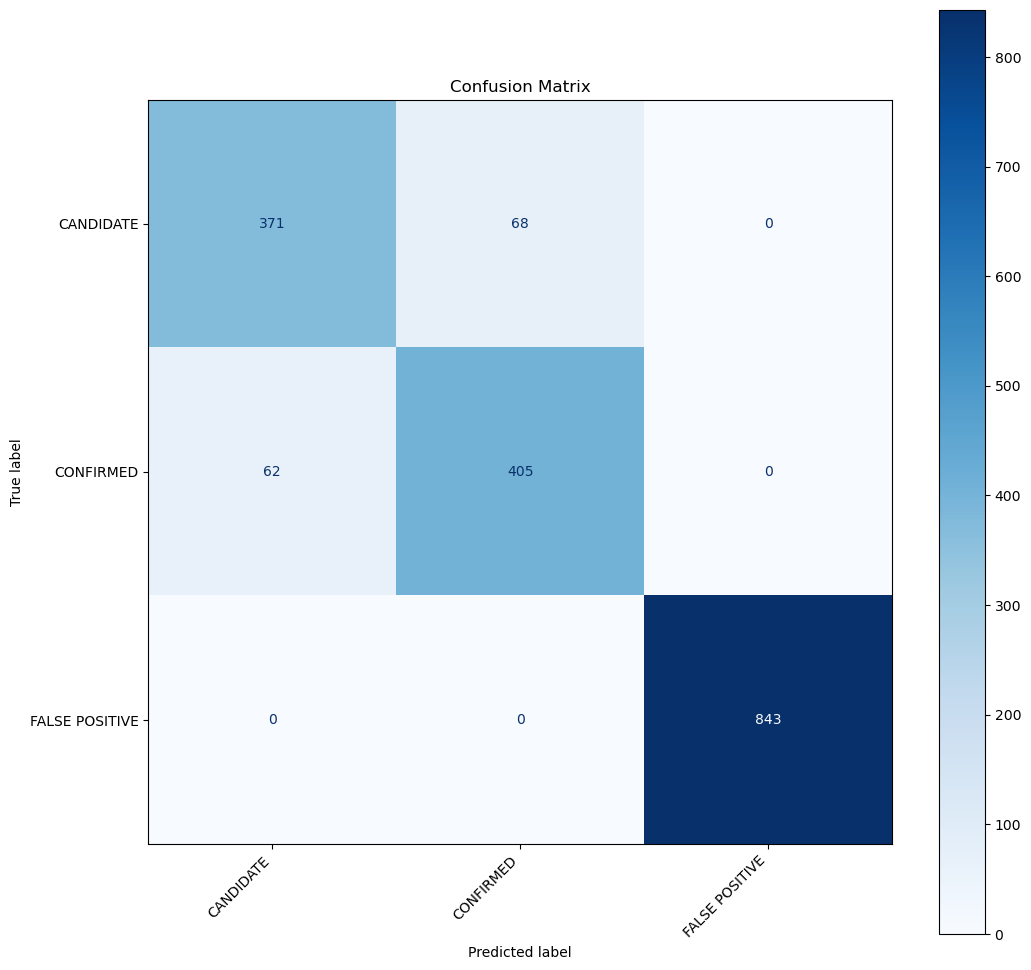

In [83]:
#XGB

xgb_model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=4, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None)
xgb_model.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test set
test_pred  = xgb_model.predict(X_test_processed )
# y_test = label_encoder.transform(y_test)
y_pred = label_encoder.inverse_transform(test_pred)

# Print classification report
print(classification_report(y_test, y_pred))


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
# Display the confusion matrix with adjustments for better readability
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()

Feature Importance

[0.4437337  0.01548259 0.12097017 0.06975795 0.07002072 0.07267927
 0.00440448 0.00284542 0.00308317 0.00313405 0.00316353 0.00356074
 0.00466457 0.00300381 0.00222735 0.00641072 0.01015807 0.02465308
 0.00386593 0.00457709 0.0048057  0.00852746 0.00894244 0.00430398
 0.00251908 0.00291742 0.00250018 0.0029936  0.04311847 0.00797524
 0.00255032 0.00640619 0.00458155 0.00334416 0.00239917 0.00232603
 0.00273913 0.0025904  0.00272625 0.00347407 0.00286491 0.00299787]


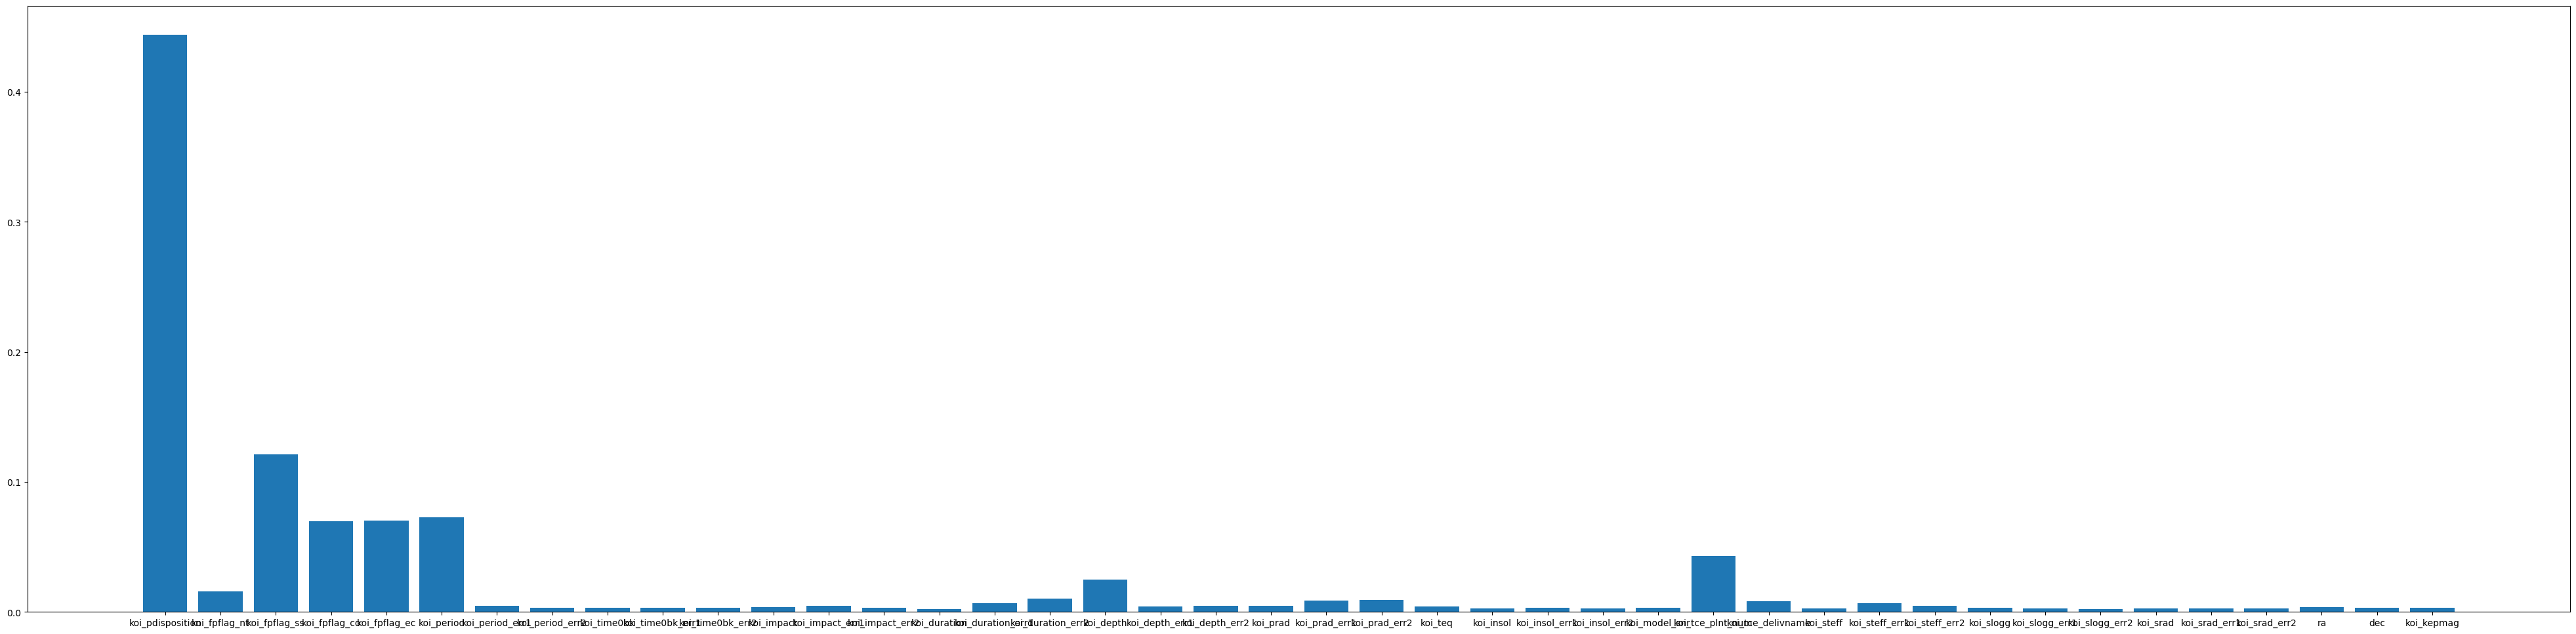

In [84]:
fig, ax = plt.subplots(figsize=(50, 12))  # Adjust the size as needed
# feature importance
print(xgb_model.feature_importances_)
# plot
plt.bar(X.columns, xgb_model.feature_importances_)
plt.show()

                precision    recall  f1-score   support

     CANDIDATE       0.84      0.84      0.84       439
     CONFIRMED       0.85      0.84      0.85       467
FALSE POSITIVE       1.00      1.00      1.00       843

      accuracy                           0.92      1749
     macro avg       0.89      0.89      0.89      1749
  weighted avg       0.92      0.92      0.92      1749



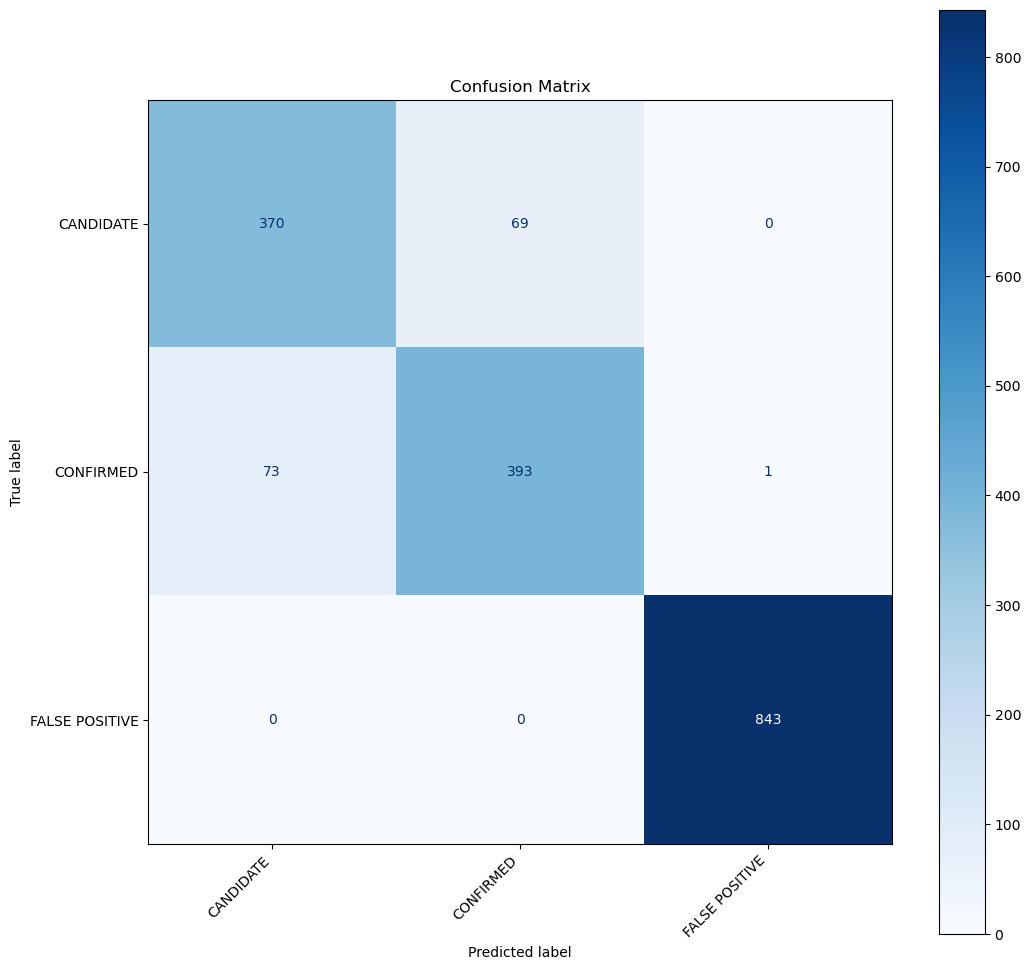

In [85]:
# Random Forest

rf_model = RandomForestClassifier(max_depth=18, max_features='log2', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=143, random_state=42)


rf_model.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test set
test_pred  = rf_model.predict(X_test_processed )
# y_test = label_encoder.transform(y_test)
y_pred = label_encoder.inverse_transform(test_pred)

# Print classification report
print(classification_report(y_test, y_pred))


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
# Display the confusion matrix with adjustments for better readability
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9068
[LightGBM] [Info] Number of data points in the train set: 6995, number of used features: 43
[LightGBM] [Info] Start training from score -1.383297
[LightGBM] [Info] Start training from score -1.319257
[LightGBM] [Info] Start training from score -0.729986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

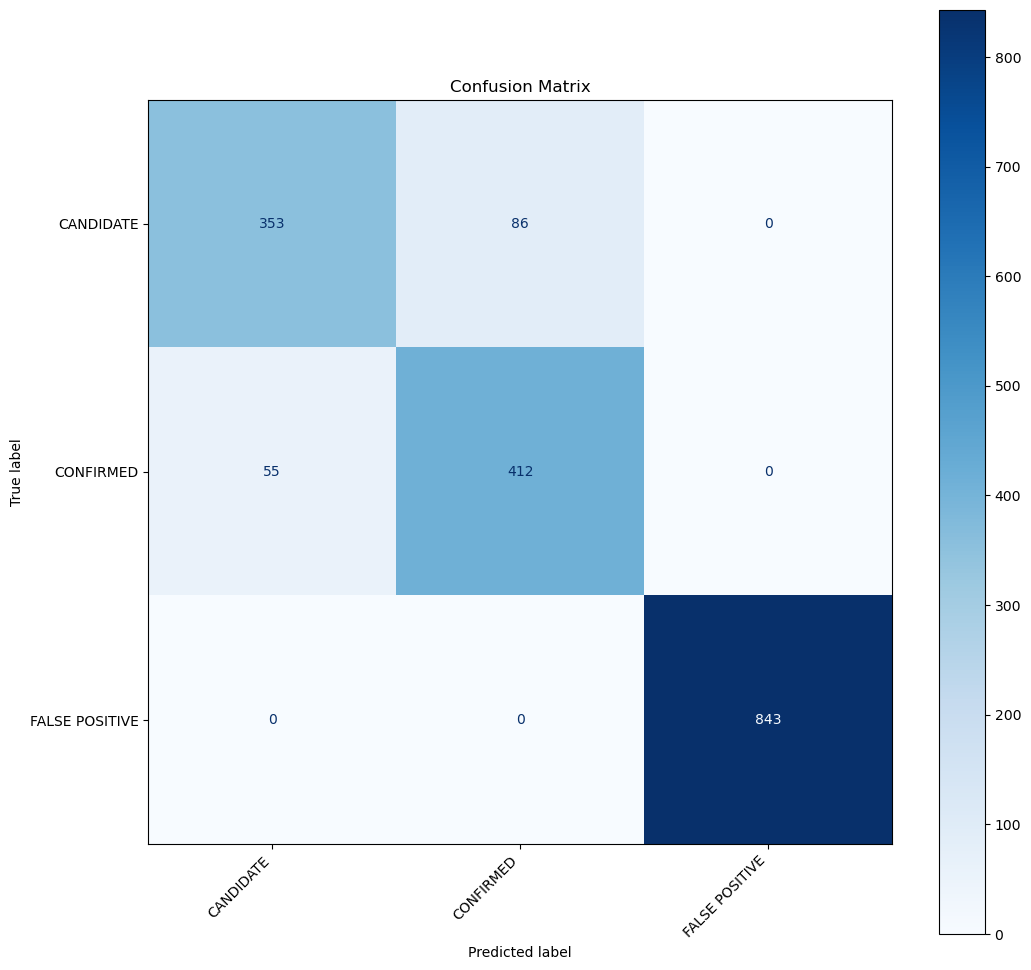

In [17]:
# LightGBM Classifier
lgbm_model = LGBMClassifier(n_estimators=200, num_leaves=100, random_state=42)


lgbm_model.fit(X_train_resampled, y_train_resampled)


# Make predictions on the test set
test_pred  = lgbm_model.predict(X_test_processed )
# y_test = label_encoder.transform(y_test)
y_pred = label_encoder.inverse_transform(test_pred)

# Print classification report
print(classification_report(y_test, y_pred))


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
# Display the confusion matrix with adjustments for better readability
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Confusion Matrix")
plt.show()